# 중심을 대표하는 값 - 평균

In [5]:
import numpy as np
# 산술평균
data = [10, 20, 30, 40, 50]
mean_value = np.mean(data)
print(mean_value)  # 30.0

30.0


In [6]:
from scipy.stats import hmean, gmean
# 기하평균
gmean(data)

np.float64(26.051710846973528)

In [6]:
# 조화평균
hmean(data)

np.float64(21.8978102189781)

In [7]:
# 가중평균
prices = [5000, 9000]
counts = [8, 2]

np.average(prices, weights=counts)

np.float64(5800.0)

# 대표값 - 중앙값

In [ ]:
data = [10, 20, 25, 40, 50]
median_value = np.median(data)
print(median_value)  # 25

25.0


# 백분위수

In [ ]:
# scores = [65, 75, 80, 85, 95]
scores = [0, 75, 80, 85, 95]
p25 = np.percentile(scores, 25) #Q1
p50 = np.percentile(scores, 50) #Q2
p75 = np.percentile(scores, 75) #Q3

print(p25, p50, p75)

75.0 80.0 85.0


In [8]:
# IQR : 사분위범위 Q3-Q1 = 85 - 75 = 10
p75 - p25

np.float64(16.25)

중앙값, 분위수는 개수(위치)를 중요시 하는 통계량
이상값/극단적인 값이 중요하지 않다.

# 대표값 - 최빈값

In [7]:
import pandas as pd

data = pd.Series([1, 2, 2, 3, 3, 3, 4, 4, 3])
mode_value = data.mode()
print(mode_value)  # 3 (가장 많이 등장한 값)

0    3
dtype: int64


# 범위의 계산 > 변동성을 측정
지표 > 극단적인 값에 민감

- 최대 / 최소 2개의 값만 사용
- 개별점수들이 다른 점수들과 얼마나 차이가 있나 x
- 실제 데이터가 어떤 값들로 구성되어 있는지는 설명할 수 없다

In [3]:
data = [10, 20, 30, 40, 50]
range_value = max(data) - min(data)
print(range_value)  # 40

40


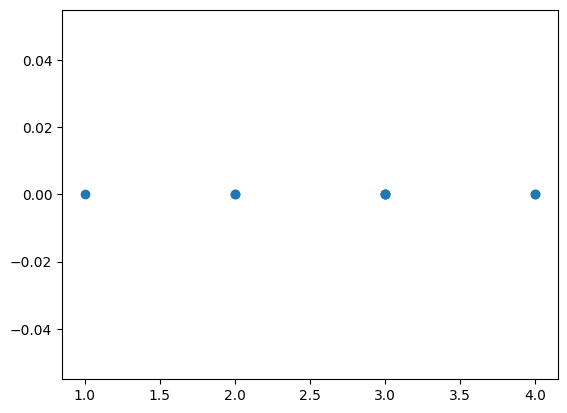

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data, np.zeros_like(data))

In [12]:
import seaborn as sns
vp_df = sns.load_dataset('iris')
vp_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# sepal_length의 범위
vp_df['sepal_length'].max() - vp_df['sepal_length'].min()

np.float64(3.6000000000000005)

In [16]:
# 모든속성의 범위
for col in vp_df.columns:
    if pd.api.types.is_numeric_dtype(vp_df[col]):
        print(f"{col}의 범위 : {vp_df[col].max() - vp_df[col].min()}")

sepal_length의 범위 : 3.6000000000000005
sepal_width의 범위 : 2.4000000000000004
petal_length의 범위 : 5.9
petal_width의 범위 : 2.4


변동성이 가장 큰 속성은 petal_length입니다.<br>
petal_length와 petal_width가 sepal_length와 sepal_width보다 상대적으로 변동성이 큽니다.<br>
<br>
모델 생성시에 다루어야 하는 속성으로 볼 수 있습니다.

In [22]:
from matplotlib import rcParams
rcParams['font.family'] = 'Hancom Gothic'
rcParams['axes.unicode_minus'] = False

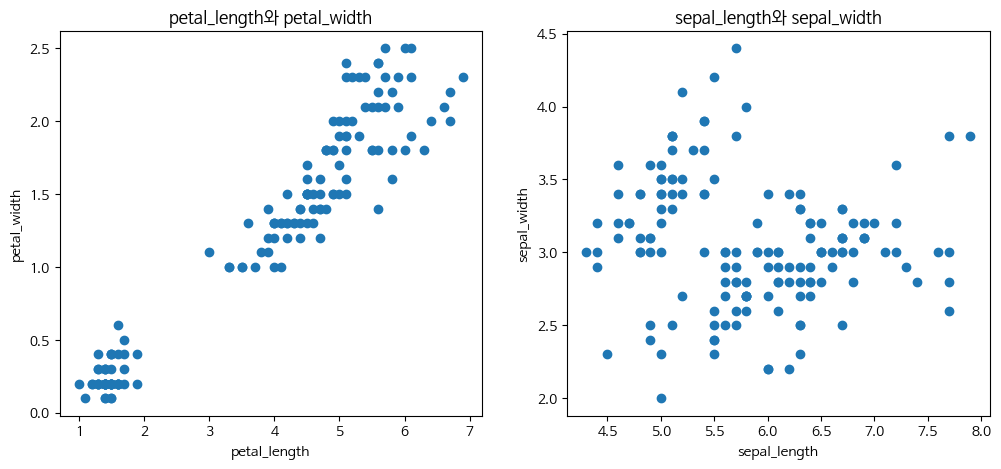

In [27]:
# 산포도로 변동성 확인하기
# petal_length와 petal_width
# sepal_length와 sepal_width

fig = plt.figure(figsize=[12,5])
axes1 = fig.add_subplot(1,2,1)
axes2 = fig.add_subplot(1,2,2)
axes1.scatter(vp_df['petal_length'],vp_df['petal_width'])
axes2.scatter(vp_df['sepal_length'],vp_df['sepal_width'])
axes1.set_title('petal_length와 petal_width')
axes2.set_title('sepal_length와 sepal_width')
axes1.set_xlabel('petal_length')
axes1.set_ylabel('petal_width')
axes2.set_xlabel('sepal_length')
axes2.set_ylabel('sepal_width')
plt.show()

산포도를 이용해 극단적으로 다른 데이터(이상치)가 있는지를 확인해야 한다.